# LOAN DEFAULT RISK ASSESSMENT BY TEAM ROCKET



---

SUBJECT - DATA ANALYTICS 
\
SUBJECT CODE- UE19CS312
\
SEM 5

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight") # 538 style used for graph visualization
sns.set_style('whitegrid') # seaborn library
%matplotlib inline

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [ ]:
data = pd.read_csv("/kaggle/input/lending-club-dataset/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


# 5. Exploratory Data Analysis

**OVERALL GOAL:** 
- Get an understanding for which variables are important, view summary statistics, and visualize the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### `loan_status`

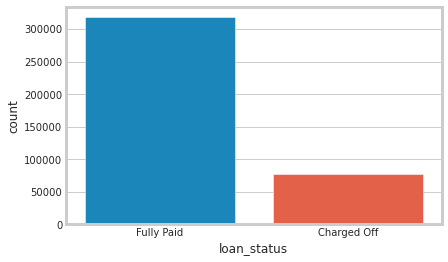

In [ ]:
sns.countplot(data.loan_status)

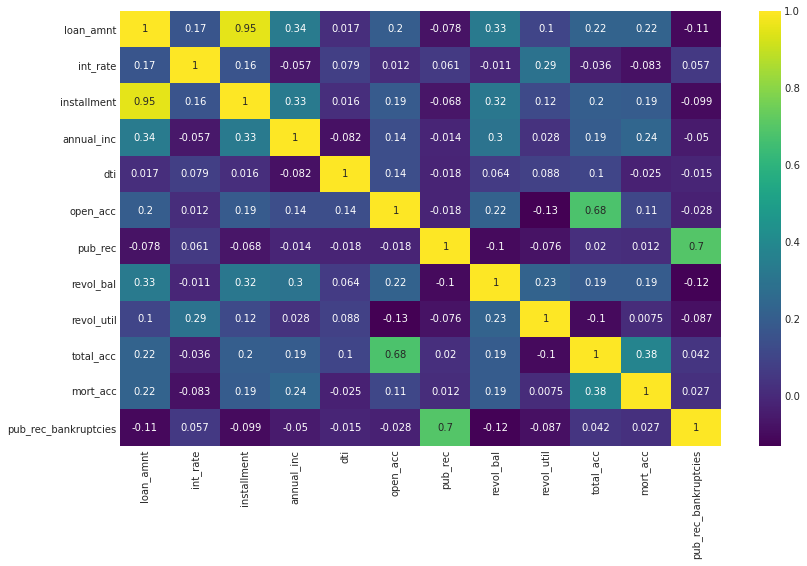

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

We noticed almost perfect correlation between "`loan_amnt`" the "`installment`" feature. We'll explore this features further. Print out their descriptions and perform a scatterplot between them. 

- Does this relationship make sense to you? 
- Do we think there is duplicate information here?

### `loan_amnt` & `installment`

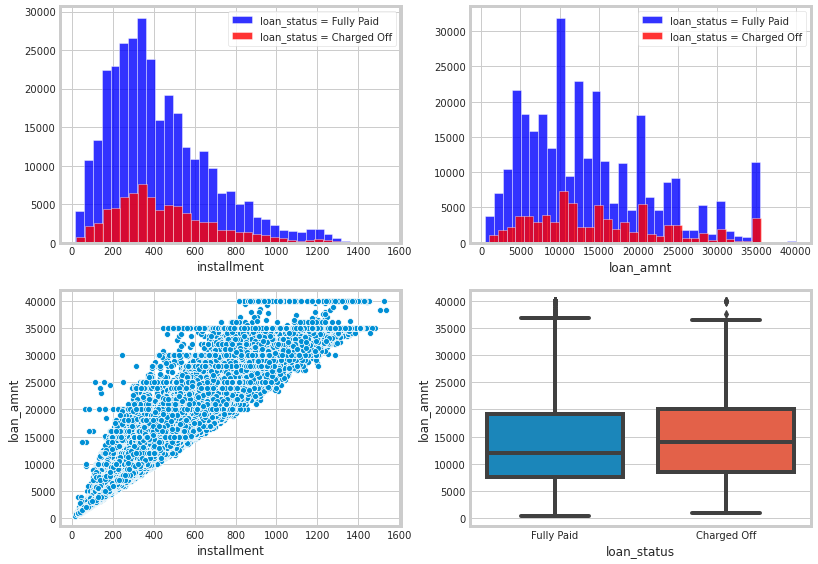

In [ ]:
plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
data[data["loan_status"] == "Fully Paid"]["installment"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.8)
data[data["loan_status"] == "Charged Off"]["installment"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.8)
plt.legend()
plt.xlabel("installment")

plt.subplot(4, 2, 2)
data[data["loan_status"] == "Fully Paid"]["loan_amnt"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.8)
data[data["loan_status"] == "Charged Off"]["loan_amnt"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.8)
plt.legend()
plt.xlabel("loan_amnt")

plt.subplot(4, 2, 3)
sns.scatterplot(x='installment', y='loan_amnt', data=data)

plt.subplot(4, 2, 4)
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.show()

In [ ]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


### `grade` & `sub_grade`
Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. 

What are the unique possible `grade` & `sub_grade`?

In [ ]:
print(f"GRADE unique: { data.grade.unique() }")
print(f"SUB_GRADE unique: { data.sub_grade.unique() }")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


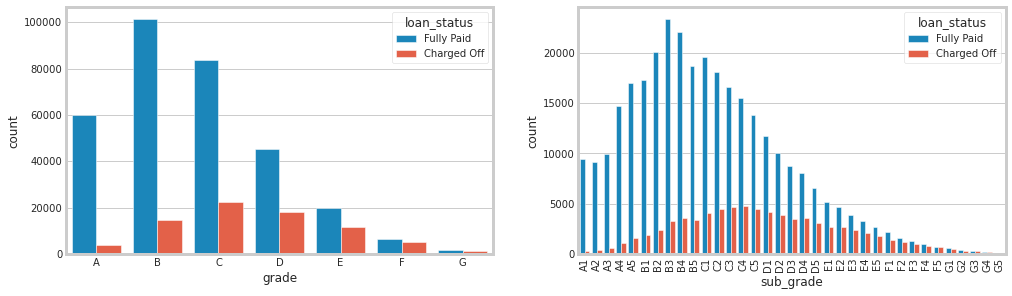

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

It looks like `F` and `G` subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

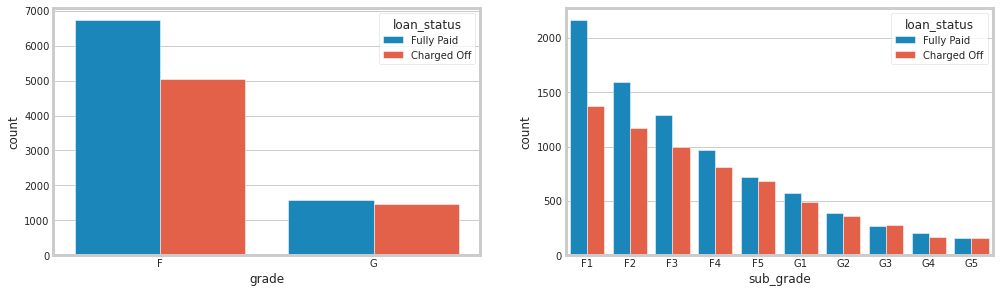

In [ ]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
plt.show()

### `term`, `home_ownership`, `verification_status` & `purpose`

In [ ]:
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

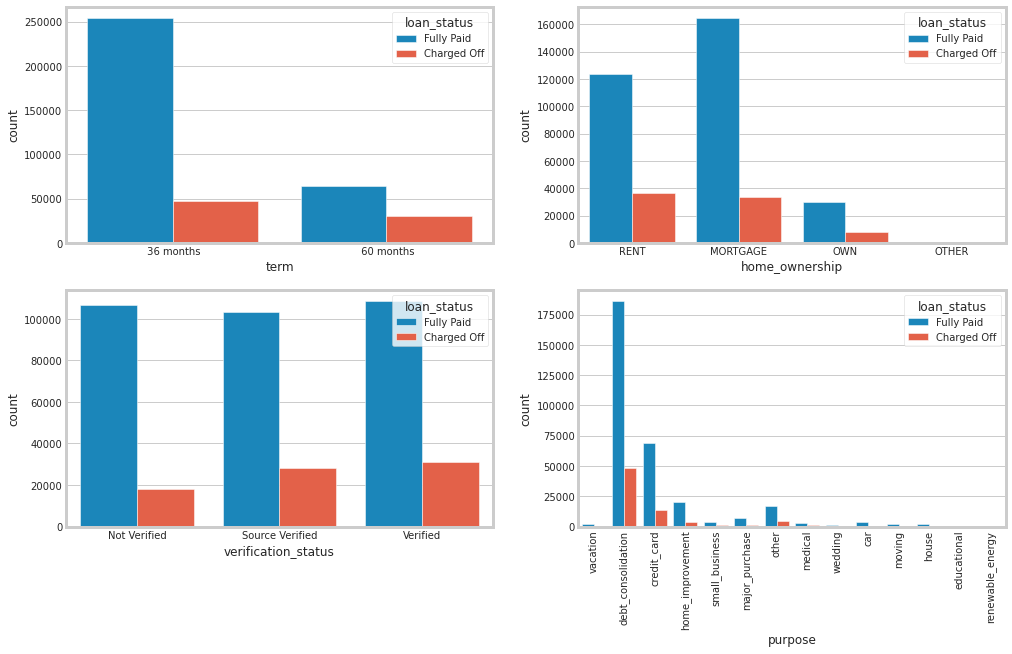

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

### `int_rate` & `annual_inc`

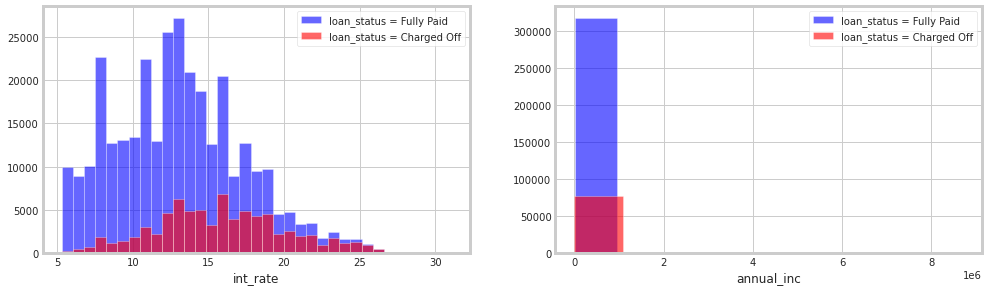

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
data[data["loan_status"] == "Fully Paid"]["int_rate"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["int_rate"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("int_rate")

plt.subplot(2, 2, 2)
data[data["loan_status"] == "Fully Paid"]["annual_inc"].hist(bins=8, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["annual_inc"].hist(bins=8, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("annual_inc")

df["annual_inc"].head()
plt.show()

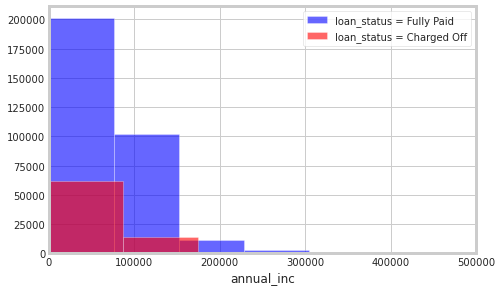

In [ ]:
# Extract more info from the annual_inc hist by limiting the range and increasing the bins

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 2)
data[data["loan_status"] == "Fully Paid"]["annual_inc"].hist(bins=100, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["annual_inc"].hist(bins=100, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("annual_inc")
plt.xlim([0, 500000])
plt.show()

In [ ]:
data[data.annual_inc >= 1000000].shape

(75, 27)

- It seems that loans with high intersest rate are more likely to be unpaid.
- Only 75 borrowers have an annual income more than 1 million.

### `emp_title` & `emp_length`

In [ ]:
data.emp_title.isna().sum() # Number of people with no emp_title

22927

In [ ]:
data['emp_title'] = data.emp_title.str.lower() # Converting emp_title to lowercase (Data Cleaning)

In [ ]:
def manager(string):
    if type(string) is str:
        return 'manager' if 'manager' in string else string

def president(string):
    if type(string) is str:
        return 'president' if 'president' in string else string
    
def nurse(string):
    if type(string) is str:
        return 'nurse' if 'nurse' in string else string
    
def driver(string):
    if type(string) is str:
        return 'driver' if 'driver' in string else string
    
def assistant(string):
    if type(string) is str:
        return 'assistant' if 'assistant' in string else string

def engineer(string):
    if type(string) is str:
        return 'engineer' if 'engineer' in string else string    

functions = [manager, president, nurse, driver, assistant, engineer]
for func in functions:
    data['emp_title'] = data.emp_title.apply(func)

In [ ]:
data.emp_title.value_counts()[:30]

manager              39831
engineer              8603
assistant             7548
driver                5743
teacher               5430
nurse                 5146
president             3276
supervisor            2591
sales                 2382
owner                 2201
rn                    2074
director              1192
police officer        1041
accountant             845
technician             839
mechanic               753
attorney               744
analyst                703
us army                671
paralegal              586
customer service       563
server                 538
electrician            527
foreman                506
operator               490
controller             470
consultant             463
bank of america        459
clerk                  452
account executive      447
Name: emp_title, dtype: int64

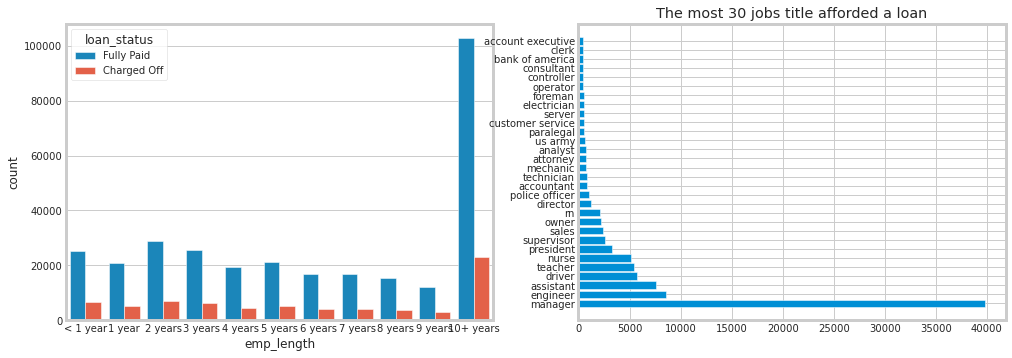

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.show()

### `issue_d`, `earliest_cr_line`

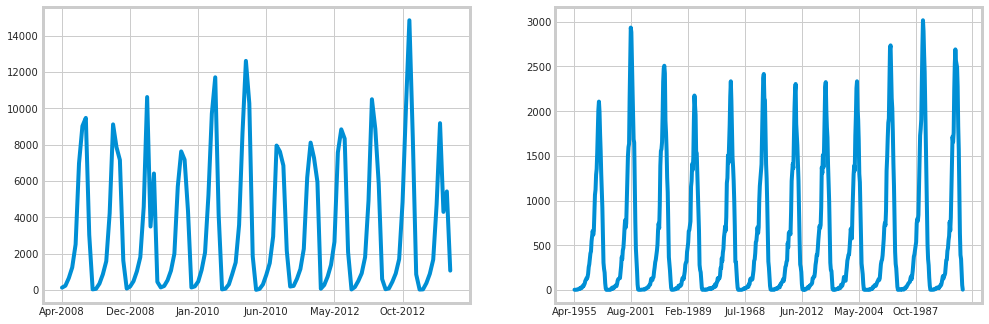

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
data.issue_d.value_counts().sort_index().plot()

plt.subplot(2, 2, 2)
data.earliest_cr_line.value_counts().sort_index().plot()
plt.show()

### `title`

In [ ]:
data.title.isna().sum() # Number of rows where title is None

1755

In [ ]:
data['title'] = data.title.str.lower() # Coverting titles to LowerCase

In [ ]:
data.title.value_counts()[:30]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
loan                           1150
payoff                         1035
credit cards                   1030
freedom                         934
debt                            933
my loan                         897
credit card loan                879
credit card                 

`title` will be removed because we have the `purpose` column with is generated from it.

### `dti`, `open_acc`, `revol_bal`, `revol_util`, & `total_acc`

In [ ]:
data.dti.value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
46.51      1
43.24      1
46.77      1
92.13      1
40.14      1
Name: dti, Length: 4262, dtype: int64

In [ ]:
data[data.open_acc > 40].shape

(217, 27)

In [ ]:
data[data.total_acc > 80].shape

(266, 27)

In [ ]:
data[data.revol_bal < 10000].shape

(177624, 27)

In [ ]:
data[data.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.00,36 months,12.49,117.08,B,B4,budget analyst,10+ years,RENT,45000.00,Verified,Apr-2014,Fully Paid,debt_consolidation,debt consolidation,14.67,Oct-1998,2.00,0.00,2677.00,892.30,9.00,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


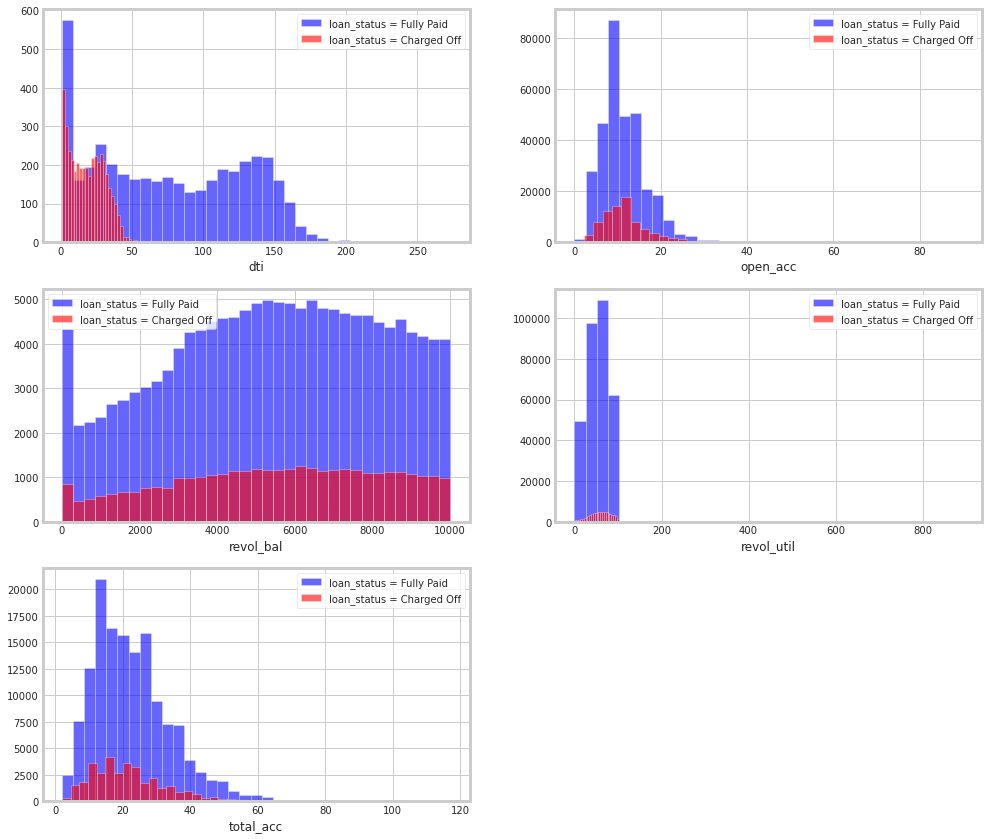

In [ ]:
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
data[data["loan_status"] == "Fully Paid"]["dti"].value_counts().hist(bins=35, color='blue', 
                                                                     label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["dti"].value_counts().hist(bins=35, color='red', 
                                                                      label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("dti")

plt.subplot(6, 2, 2)
data[data["loan_status"] == "Fully Paid"]["open_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["open_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("open_acc")

plt.subplot(6, 2, 3)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["revol_bal"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["revol_bal"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_bal")

plt.subplot(6, 2, 4)
data[data["loan_status"] == "Fully Paid"]["revol_util"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["revol_util"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_util")

plt.subplot(6, 2, 5)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["total_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["total_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("total_acc")
plt.show()

- It seems that the smaller the `dti` the more likely that the loan will not be paid.
- Only `217` borrower have more than `40` open credit lines.
- Only `266` borrower have more than `80` credit line in the borrower credit file.

### `pub_rec`, `initial_list_status`, `application_type`, `mort_acc`, & `pub_rec_bankruptcies`

In [ ]:
data.pub_rec.value_counts()

0.00     338272
1.00      49739
2.00       5476
3.00       1521
4.00        527
5.00        237
6.00        122
7.00         56
8.00         34
9.00         12
10.00        11
11.00         8
13.00         4
12.00         4
19.00         2
86.00         1
40.00         1
17.00         1
15.00         1
24.00         1
Name: pub_rec, dtype: int64

In [ ]:
data.initial_list_status.value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [ ]:
data.application_type.value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [ ]:
data.mort_acc.value_counts()

0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
23.00         2
32.00         2
26.00         2
31.00         2
30.00         1
28.00         1
34.00         1
Name: mort_acc, dtype: int64

In [ ]:
data.pub_rec_bankruptcies.value_counts()

0.00    350380
1.00     42790
2.00      1847
3.00       351
4.00        82
5.00        32
6.00         7
7.00         4
8.00         2
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [ ]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

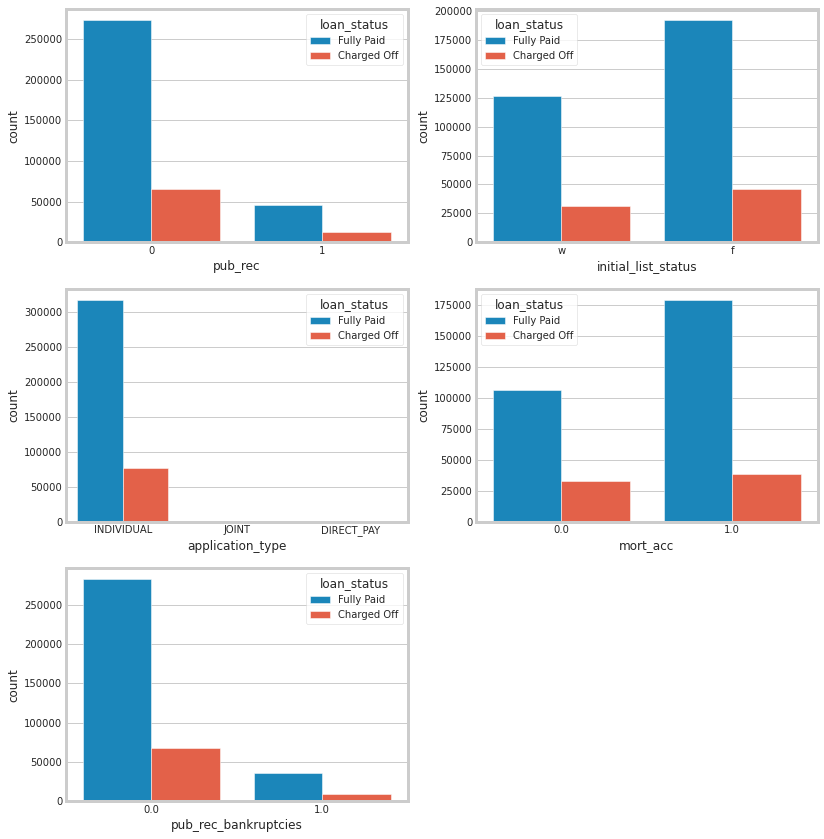

In [ ]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

plt.show()

## How numeric features correlate with the target variable?

In [ ]:
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

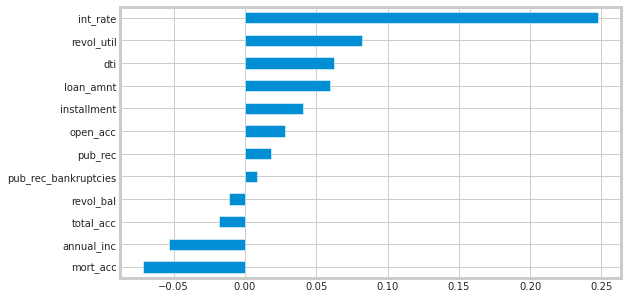

In [ ]:
plt.figure(figsize=(8, 5))
data.corr()['loan_status'].drop('loan_status').sort_values().plot(kind='barh')
plt.show()

****
## Conclusion:

We notice that, there are broadly three types of features: 
- 1. Features related to the applicant (demographic variables such as occupation, employment details etc.), 
- 2. Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.) 
****

# 6. Data PreProcessing

**Section Goals:** 
- Remove or fill any missing data. 
- Remove unnecessary or repetitive features. 
- Convert categorical string features to dummy variables.

In [ ]:
# The length of the data
print(f"The Length of the data: { data.shape }")

The Length of the data: (396030, 27)


In [ ]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


### `emp_title`

In [ ]:
data.emp_title.nunique()

139595

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [ ]:
data.drop('emp_title', axis=1, inplace=True)

### `emp_length`

In [ ]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [ ]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
0   0.82
1   0.18
Name: loan_status, dtype: float64
4 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
0   0.79
1   0.21
Name: loan_status, dtype: float64
6 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
9 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
2 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
3 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
8 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
7 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
5 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
1 year years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
nan years in this position:
Series([], Name: loan_status, dtype: float64)


Charge off rates are extremely similar across all employment lengths. So we are going to drop the `emp_length` column.

In [ ]:
data.drop('emp_length', axis=1, inplace=True)

### `title`

In [ ]:
data.title.value_counts().head()

debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: title, dtype: int64

In [ ]:
data.purpose.value_counts().head()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: purpose, dtype: int64

The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [ ]:
data.drop('title', axis=1, inplace=True)

### `mort_acc`

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! 

Let's review the other columsn to see which most highly correlates to mort_acc

In [ ]:
data.mort_acc.value_counts()

1.00    218458
0.00    139777
Name: mort_acc, dtype: int64

In [ ]:
data.mort_acc.isna().sum()

37795

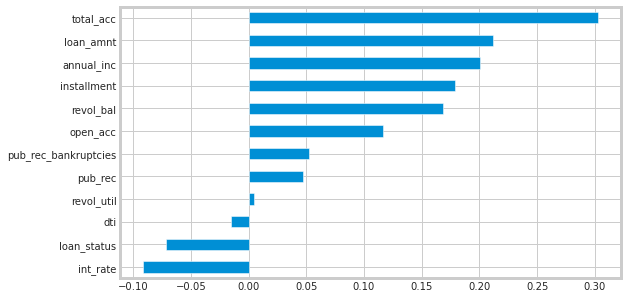

In [ ]:
plt.figure(figsize=(8, 5))
data.corr()['mort_acc'].drop('mort_acc').sort_values().plot(kind='barh')
plt.show()

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [ ]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

In [ ]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [ ]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

### `revol_util` & `pub_rec_bankruptcies`
These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().

In [ ]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(395219, 24)

## Categorical Variables and Dummy Variables

In [ ]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


### `term`

In [ ]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [ ]:
data.term.unique()

array([36, 60])

### `grade` & `sub_grade`

We know that `grade` is just a sub feature of `sub_grade`, So we are goinig to drop it.

In [ ]:
data.drop('grade', axis=1, inplace=True)

In [ ]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,...,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.00,36,11.44,329.48,117000.00,Jan-2015,0,26.24,Jun-1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
1,8000.00,36,11.99,265.68,65000.00,Jan-2015,0,22.05,Jul-2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,Jan-2015,0,12.79,Aug-2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,7200.00,36,6.49,220.65,54000.00,Nov-2014,0,2.60,Sep-2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.00,60,17.27,609.33,55000.00,Apr-2013,1,33.95,Mar-1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### `address`
We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [ ]:
data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [ ]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [ ]:
data.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [ ]:
data.drop('address', axis=1, inplace=True)

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36,11.44,329.48,117000.00,Jan-2015,0,26.24,Jun-1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36,11.99,265.68,65000.00,Jan-2015,0,22.05,Jul-2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,Jan-2015,0,12.79,Aug-2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36,6.49,220.65,54000.00,Nov-2014,0,2.60,Sep-2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60,17.27,609.33,55000.00,Apr-2013,1,33.95,Mar-1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


### `issue_d` 

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [ ]:
data.drop('issue_d', axis=1, inplace=True)

### `earliest_cr_line`
This appears to be a historical time stamp feature. Extract the year from this feature using a `.apply()` function, then convert it to a numeric feature.

In [ ]:
data['earliest_cr_line'] = data.earliest_cr_line.str.split('-', expand=True)[1]

In [ ]:
data.earliest_cr_line.nunique()

65

## Check for duplicates columns & features

In [ ]:
# print(f"Data shape: {data.shape}")

# # Remove duplicate Features
# data = data.T.drop_duplicates()
# data = data.T

# # Remove Duplicate Rows
# data.drop_duplicates(inplace=True)

# print(f"Data shape: {data.shape}")

## Train Test Split

In [ ]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.8038479931379817
Weight of negative values 0.19615200686201828


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler


X = data.drop('loan_status', axis=1)
y = data.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276653, 78)
(118566, 78)
(276653,)
(118566,)


## Normalizing the data

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Models Building

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# 7. 1. Dense Neural Network with Dropout (Deep Learning)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.activations import sigmoid, relu
from tensorflow.keras.metrics import AUC

In [ ]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(history):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history.history['AUC'], label='AUC')
    plt.plot(history.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i])(x)
        x = Activation(activation=relu)(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels)(x)
    x = Activation(activation=sigmoid)(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss=BinaryCrossentropy(), metrics=[AUC(name='AUC')])
    return model

In [ ]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 78)                312       
_________________________________________________________________
dropout (Dropout)            (None, 78)                0         
_________________________________________________________________
dense (Dense)                (None, 150)               11850     
_________________________________________________________________
activation (Activation)      (None, 150)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)              

In [ ]:
r = model.fit(
    x=X_train, 
    y=y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=65536
)

Epoch 1/30
4/4 [==============================] - 3s 829ms/step - loss: 0.7129 - AUC: 0.6845 - val_loss: 0.6766 - val_AUC: 0.7157
Epoch 2/30
4/4 [==============================] - 3s 748ms/step - loss: 0.5612 - AUC: 0.7933 - val_loss: 0.6435 - val_AUC: 0.7444
Epoch 3/30
4/4 [==============================] - 3s 800ms/step - loss: 0.4802 - AUC: 0.7877 - val_loss: 0.6094 - val_AUC: 0.7542
Epoch 4/30
4/4 [==============================] - 3s 682ms/step - loss: 0.4217 - AUC: 0.7974 - val_loss: 0.5719 - val_AUC: 0.7883
Epoch 5/30
4/4 [==============================] - 3s 694ms/step - loss: 0.3768 - AUC: 0.8180 - val_loss: 0.5336 - val_AUC: 0.8199
Epoch 6/30
4/4 [==============================] - 3s 692ms/step - loss: 0.3467 - AUC: 0.8316 - val_loss: 0.4983 - val_AUC: 0.8379
Epoch 7/30
4/4 [==============================] - 3s 685ms/step - loss: 0.3281 - AUC: 0.8410 - val_loss: 0.4684 - val_AUC: 0.8493
Epoch 8/30
4/4 [==============================] - 3s 700ms/step - loss: 0.3180 - AUC: 0.84

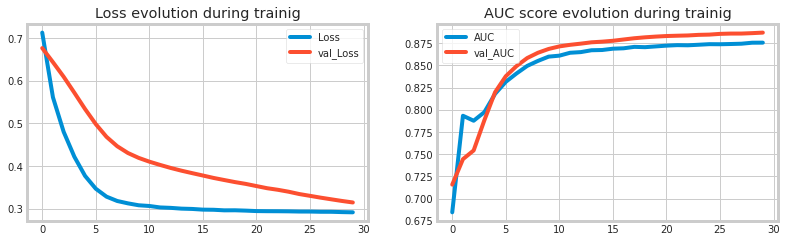

In [ ]:
plot_learning_evolution(r)
plt.show()

In [ ]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=False)

Test Result:
Accuracy Score: 88.79%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      0.88     1.00      0.89       0.94          0.90
recall         1.00     0.43      0.89       0.71          0.89
f1-score       0.93     0.60      0.89       0.77          0.87
support   222387.00 54266.00      0.89  276653.00     276653.00
_______________________________________________
Confusion Matrix: 
 [[222387      0]
 [ 31024  23242]]



In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

Test Result:
Accuracy Score: 88.79%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.88     1.00      0.89       0.94          0.90
recall        1.00     0.43      0.89       0.71          0.89
f1-score      0.93     0.60      0.89       0.77          0.87
support   95309.00 23257.00      0.89  118566.00     118566.00
_______________________________________________
Confusion Matrix: 
 [[95309     0]
 [13297  9960]]



In [ ]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

# 7. 2. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

#n_estimators = [50, 100, 200]
#learning_rate = [0.05, 0.01, 0.5, 0.1, 1]
#tree_method = ['gpu_hist']

#params_grid = {
#    'n_estimators': n_estimators,
#     'learning_rate': learning_rate,
#}

xgb_clf = XGBClassifier(use_label_encoder=True)
#xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
# xgb_cv.fit(X_train, y_train)
# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
#best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
#print(f"Best Parameters: {best_params}")
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

[16:38:50] WARNING: ../src/learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Result:
Accuracy Score: 89.58%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      0.89     0.94      0.90       0.92          0.90
recall         0.99     0.50      0.90       0.75          0.90
f1-score       0.94     0.65      0.90       0.80          0.88
support   222387.00 54266.00      0.90  276653.00     276653.00
_______________________________________________
Confusion Matrix: 
 [[220726   1661]
 [ 27161  27105]]

Test Result:
Accuracy Score: 88.92%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      

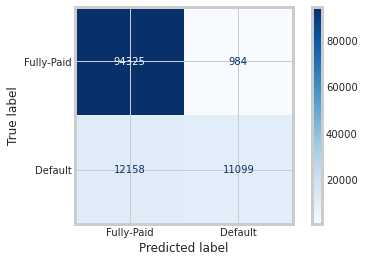

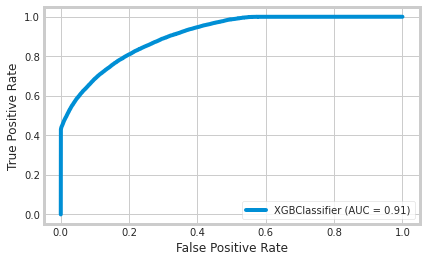

In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(xgb_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Default'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plt.show()

In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

# 7. 3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      1.00     1.00      1.00       1.00          1.00
recall         1.00     1.00      1.00       1.00          1.00
f1-score       1.00     1.00      1.00       1.00          1.00
support   222387.00 54266.00      1.00  276653.00     276653.00
_______________________________________________
Confusion Matrix: 
 [[222387      0]
 [     1  54265]]

Test Result:
Accuracy Score: 88.87%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.88     0.96      0.89       0.92          0.90
recall        1.00     0.45      0.89       0.72          0.89
f1-score      0.94     0.61      0.89       0.77          0.87
support   95309.00 23257.00      0.89  118566.00     118566.00
_____________________________________________

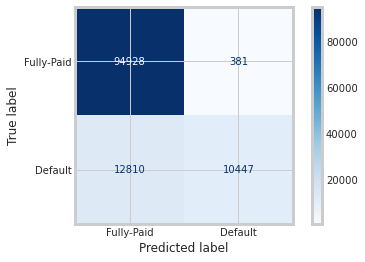

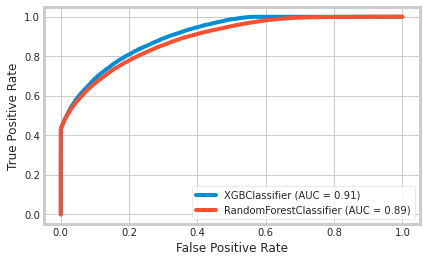

In [ ]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Default'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)
plt.show()

In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

## 7.4. LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = MinMaxScaler().fit_transform(X)

In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=200, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc: float = accuracy_score(y_pred, y_test) * 100
print(f"Logistic Regression Accuracy: {LRAcc:.2f}%.")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     95309
         1.0       0.97      0.45      0.61     23257

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566

[[94975   334]
 [12842 10415]]
Logistic Regression Accuracy: 88.89%.


In [ ]:
scores_dict['Logistic Regression'] = {
        'Train': roc_auc_score(y_train, LRclassifier.predict(X_train)),
        'Test': roc_auc_score(y_test, LRclassifier.predict(X_test)),
    }

## 7.5. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=200)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc: float = accuracy_score(y_pred,y_test) * 100
print(f'Support Vector Classifier Accuracy: {SVCAcc:.2f}%.')

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84     95309
         1.0       0.20      0.12      0.15     23257

    accuracy                           0.73    118566
   macro avg       0.50      0.50      0.50    118566
weighted avg       0.69      0.73      0.71    118566

[[84008 11301]
 [20460  2797]]
Support Vector Classifier Accuracy: 73.21%.


In [ ]:
scores_dict['Support Vector Classifier'] = {
        'Train': roc_auc_score(y_train, SVCclassifier.predict(X_train)),
        'Test': roc_auc_score(y_test, SVCclassifier.predict(X_test)),
    }

# 8. Comparing Models Prerformance

In [ ]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'ANNs': model,
    'Logistic Regression': LRclassifier,
    'Support Vector Classifier': SVCclassifier
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.723
XGBOOST                        roc_auc_score: 0.733
ANNS                           roc_auc_score: 0.890
LOGISTIC REGRESSION            roc_auc_score: 0.722
SUPPORT VECTOR CLASSIFIER      roc_auc_score: 0.501


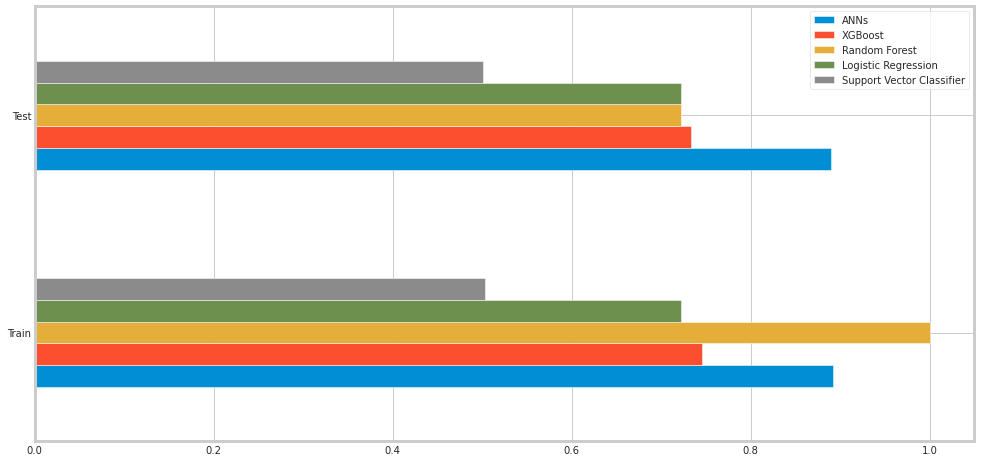

In [ ]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))
plt.show()